In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AllData_new_used-11-2022.csv',low_memory=False)
#df = pd.read_csv('AllData_new_used.csv',low_memory=False)

df = df.drop(columns=['Unnamed: 0'])
df['year_month'] = pd.to_datetime(df['scraped_first_time'].str.split('-').str[:2].str.join('-'), format='%Y-%m')

df['new=0, certified=1, used=2'] = np.where((df['new=0, certified=1, used=2']=='Published') & (df['kilometers'] < 200), '0', df['new=0, certified=1, used=2'])
df['new=0, certified=1, used=2'] = np.where((df['new=0, certified=1, used=2']=='Published') & (df['kilometers'] >= 200), '2', df['new=0, certified=1, used=2'])
df['new=0, certified=1, used=2'] = np.where((df['new=0, certified=1, used=2']=='Sold') & (df['kilometers'] < 200), '0', df['new=0, certified=1, used=2'])
df['new=0, certified=1, used=2'] = np.where((df['new=0, certified=1, used=2']=='Sold') & (df['kilometers'] >= 200), '2', df['new=0, certified=1, used=2'])
df['new=0, certified=1, used=2'] = df['new=0, certified=1, used=2'].str.replace('Certified Pre-Owned', '1').astype(float)
df_new = df[df['new=0, certified=1, used=2'] < 1]
df_used = df[df['new=0, certified=1, used=2'] >= 1]

In [3]:
df_new_nov = df_new[df_new['year_month']=='2022-11-01']
df_new_nov

,scraped_first_time,make,model,year,kilometers,price,province,City,Vehicle_information.transmission,Vehicle_information.drivetrain,Vehicle_information.body_style,Vehicle_information.exterior_colour,Vehicle_information.fuel_type,Vehicle_information.trim,"new=0, certified=1, used=2",year_month
787889,2022-11-08,Ram,1500 Classic,2022,10,59045,Alberta,Peace River,Automatic,4WD,Pickup,White,Gas,Tradesman,0.0,2022-11-01
787892,2022-11-08,Audi,Q7,2023,90,92795,British Columbia,Richmond,Automatic,AWD,Suv,White,Hybrid,Progressiv 55 Tfsi Quattro,0.0,2022-11-01
787893,2022-11-08,Ford,F 150,2022,150,89799,Ontario,Burlington,Automatic,4WD,Pickup,Grey,Gas,Lariat,0.0,2022-11-01
787909,2022-11-08,Ford,Expedition,2022,150,102559,Ontario,Burlington,Automatic,4WD,Suv,Black,Gas,Ltd Max,0.0,2022-11-01
787915,2022-11-08,Ram,1500,2022,0,58999,British Columbia,Surrey,Automatic,RWD,Pickup,Black,Gas,Big Horn,0.0,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933999,2022-11-02,Chevrolet,Colorado,2022,90,46453,Manitoba,Brandon,Automatic,4WD,Pickup,White,Gas,Z71,0.0,2022-11-01
934001,2022-11-02,Ram,1500 Classic,2022,30,67045,Manitoba,Morden,Automatic,4WD,Pickup,Grey,Gas,Tradesman,0.0,2022-11-01
934005,2022-11-02,Chevrolet,Colorado,2022,90,45358,Manitoba,Brandon,Automatic,4WD,Pickup,White,Gas,Z71,0.0,2022-11-01
934006,2022-11-02,Chevrolet,Colorado,2022,90,45853,Manitoba,Brandon,Automatic,4WD,Pickup,Grey,Gas,Z71,0.0,2022-11-01


In [4]:
df_used_nov = df_used[df_used['year_month']=='2022-11-01']
df_used_nov

,scraped_first_time,make,model,year,kilometers,price,province,City,Vehicle_information.transmission,Vehicle_information.drivetrain,Vehicle_information.body_style,Vehicle_information.exterior_colour,Vehicle_information.fuel_type,Vehicle_information.trim,"new=0, certified=1, used=2",year_month
41757,2022-11-02,Lexus,Rx,2004,241456,5995,Ontario,Toronto,Automatic,4WD,Suv,Silver,Gas,Rx 330,2.0,2022-11-01
41758,2022-11-02,Jeep,Grand Cherokee,2002,212121,1997,Ontario,Concord,Automatic,4WD,Suv,Silver,Gas,Laredo,2.0,2022-11-01
41759,2022-11-02,Pontiac,Solstice,2006,63515,16999,Ontario,Woodstock,Manual,RWD,Convertible,Red,Gas,Convertible,2.0,2022-11-01
41760,2022-11-02,Toyota,4Runner,2010,204962,23900,Alberta,Edmonton,Automatic,4WD,Suv,Blue,Gas,V6 Sr5,2.0,2022-11-01
41761,2022-11-02,Chevrolet,Impala,2009,168881,4900,Ontario,Whitby,Automatic,FWD,Sedan,Red,Gas,Ltz,2.0,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039919,2022-11-05,Ford,Explorer,2015,105000,26788,Ontario,Guelph,Automatic,4WD,Suv,White,Gas,Ltd,1.0,2022-11-01
1039920,2022-11-05,Ram,1500,2015,75000,30998,Ontario,Guelph,Automatic,4WD,Pickup,Grey,Gas,Big Horn,1.0,2022-11-01
1039921,2022-11-05,Jeep,Grand Cherokee,2015,146000,25998,Ontario,Guelph,Automatic,4WD,Suv,Black,Gas,Laredo,1.0,2022-11-01
1039922,2022-11-05,Kia,Optima,2014,96000,16995,Ontario,Guelph,Automatic,FWD,Sedan,Grey,Gas,Sx Turbo,1.0,2022-11-01


In [5]:
grouped = pd.DataFrame(columns = ['New', 'Used'], index = ['Convertible', 'Coupe', 'Hatchback', 'Pickup', 'Sedan', 'Suv',
       'Van/Minivan', 'Wagon'])
grouped

,New,Used
Convertible,NaN,NaN
Coupe,NaN,NaN
Hatchback,NaN,NaN
Pickup,NaN,NaN
Sedan,NaN,NaN
Suv,NaN,NaN
Van/Minivan,NaN,NaN
Wagon,NaN,NaN


In [6]:
new_grouped_nov= df_new_nov.groupby('Vehicle_information.body_style').mean()['price']
new_grouped_nov

Vehicle_information.body_style
Coupe          53948.000000
Pickup         67343.867925
Sedan          34758.000000
Suv            63422.019608
Van/Minivan    57288.800000
Name: price, dtype: float64

In [7]:
used_grouped_nov = df_used_nov.groupby('Vehicle_information.body_style').mean()['price']
used_grouped_nov

Vehicle_information.body_style
Convertible    60922.581395
Coupe          43000.907104
Hatchback      22740.582031
Pickup         44781.885768
Sedan          24821.503401
Suv            33671.411323
Van/Minivan    28764.268852
Wagon          29629.250000
Name: price, dtype: float64

In [8]:
for i in used_grouped_nov.index:
    try:
        grouped.loc[i, 'New'] = new_grouped_nov.loc[i]
    except:
        grouped.loc[i, 'New'] = 0
    grouped.loc[i, 'Used'] = used_grouped_nov.loc[i]

In [9]:
grouped

,New,Used
Convertible,0,60922.581395
Coupe,53948.0,43000.907104
Hatchback,0,22740.582031
Pickup,67343.867925,44781.885768
Sedan,34758.0,24821.503401
Suv,63422.019608,33671.411323
Van/Minivan,57288.8,28764.268852
Wagon,0,29629.25


In [10]:
grouped['New'].values

array([0, 53948.0, 0, 67343.8679245283, 34758.0, 63422.01960784314,
       57288.8, 0], dtype=object)

In [9]:
import datetime as dt
from datetime import datetime

df_x = pd.DataFrame(columns=['Descriptor','New','Used']).set_index('Descriptor')
#display(df.loc[(df['Vehicle_information.body_style']=='Hatchback') & (df['year_month']=='2022-11')])

#Avg, MOM, YOY for each body style

last_month = dt.date.today().replace(day=1).strftime("%Y-%m")
last_last_month = (dt.date.today().replace(day=1) - dt.timedelta(days=1)).strftime("%Y-%m")

#df_new['Vehicle_information.body_style'] = df_new['Vehicle_information.body_style'].replace(['Sedan', 'Coupe', 'Hatchback', 'Wagon', 'Convertible'],  'Car').replace('Pickup','Truck')
#df_used['Vehicle_information.body_style'] = df_used['Vehicle_information.body_style'].replace(['Sedan', 'Coupe', 'Hatchback', 'Wagon', 'Convertible'],  'Car').replace('Pickup','Truck')

for n in ['New','Used']:
    if n == 'New':
        df_n = df_new.copy()
    elif n == 'Used':
        df_n = df_used.copy()

    for body in df_n['Vehicle_information.body_style'].unique():
        if n == 'New':
            df_n = df_new[df_new['Vehicle_information.body_style']==body].copy()
        elif n == 'Used':
            df_n = df_used[df_used['Vehicle_information.body_style']==body].copy()
        year_averages = df_n.groupby(pd.PeriodIndex(df_n['year_month'], freq='Y'))['price'].mean()
        pre_month_avg = df_n[df_n['year_month']==last_last_month]['price'].mean()
        cur_month_avg = df_n[df_n['year_month']==last_month]['price'].mean()
        
        if n == 'New':
            df_n = df_new[df_new['year_month']==last_month].copy()
        elif n == 'Used':
            df_n = df_used[df_used['year_month']==last_month].copy()           
        df_n = df_n[df_n['Vehicle_information.body_style']==body]
        
        df_x.loc['{} average - {}'.format(body.upper(), datetime.strptime(last_month, "%Y-%m").strftime("%B")), n] = '{:.2f}'.format(df_n['price'].mean())
        df_x.loc['{} %MOM {}-{}'.format(body.upper(), datetime.strptime(last_last_month, "%Y-%m").strftime("%b"), datetime.strptime(last_month, "%Y-%m").strftime("%b")), n] = 100 * (cur_month_avg - pre_month_avg) / pre_month_avg
        df_x.loc['{} %YOY 2022-2021'.format(body.upper()), n] = '{:.2f}'.format((year_averages.loc['2022'] / year_averages.loc['2021'] - 1)*100)

df_x = df_x.reset_index()
display(df_x)

,Descriptor,New,Used
0,SEDAN average - November,34758.00,24821.50
1,SEDAN %MOM Oct-Nov,-8.691666,-1.408482
2,SEDAN %YOY 2022-2021,11.24,36.19
3,SUV average - November,63422.02,33671.41
4,SUV %MOM Oct-Nov,8.763355,-3.21911
5,SUV %YOY 2022-2021,9.18,19.01
6,VAN/MINIVAN average - November,57288.80,28764.27
7,VAN/MINIVAN %MOM Oct-Nov,-4.158743,1.03399
8,VAN/MINIVAN %YOY 2022-2021,15.37,30.54
9,COUPE average - November,53948.00,43000.91


                        Descriptor       New      Used
21  CONVERTIBLE average - November         0  60922.58
9         COUPE average - November  53948.00  43000.91
15    HATCHBACK average - November         0  22740.58
12       PICKUP average - November  67343.87  44781.89
0         SEDAN average - November  34758.00  24821.50
3           SUV average - November  63422.02  33671.41
6   VAN/MINIVAN average - November  57288.80  28764.27
18        WAGON average - November         0  29629.25


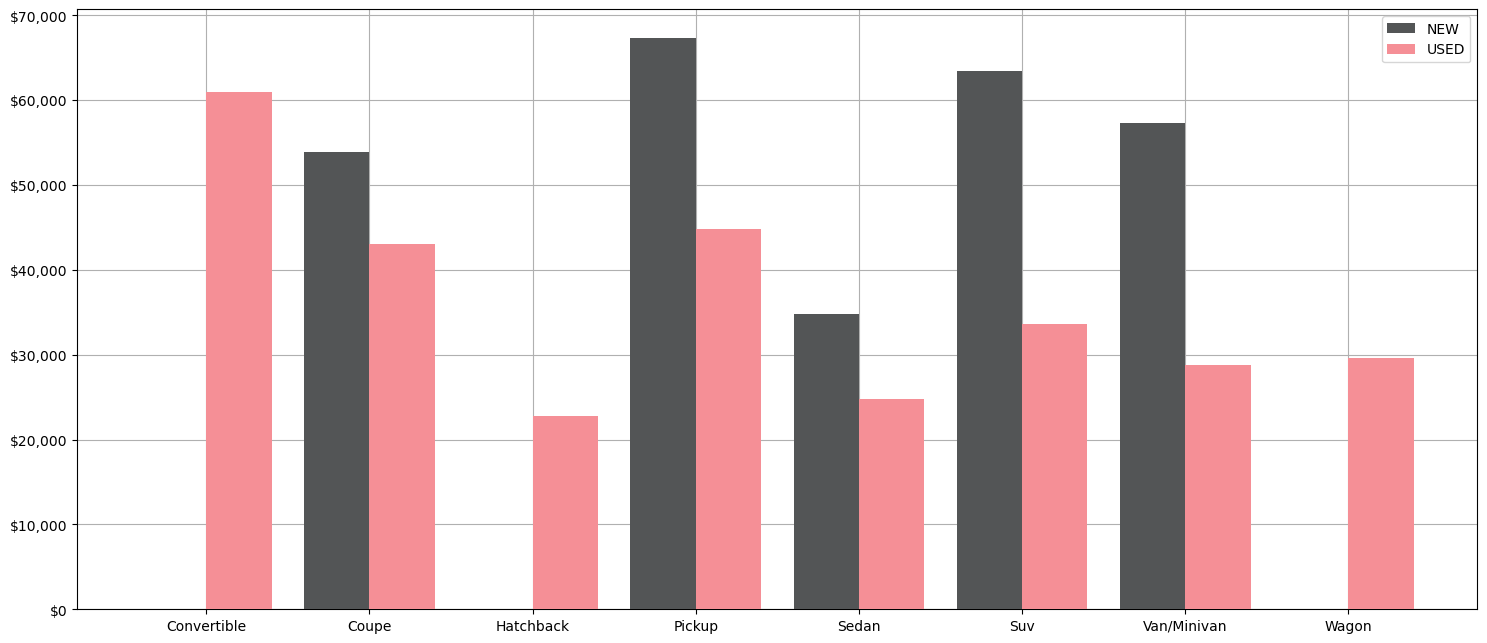

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick


import matplotlib.ticker as mtick


data = df_x.loc[df_x['Descriptor'].str.contains('average')].replace('nan',0)
data = data.sort_values(by=['Descriptor'])
print(data)
X = [x.replace(f' average - {datetime.strptime(last_month, "%Y-%m").strftime("%B")}', '').title() for x in data['Descriptor'].values]
data = [[float(x) for x in data['New'].values], [float(x) for x in data['Used'].values]]
x= np.arange(len(X))
fig = plt.figure(figsize=(14,6))

ax = fig.add_axes([0,0,1,1])

ax.bar( x- 0.2, data[0], color = '#535556',  width = 0.4, label = 'NEW', zorder=3)
ax.bar(x + 0.2, data[1], color = '#f58f96', width = 0.4, label = 'USED', zorder=3)
plt.xticks(x, X)
tick = mtick.StrMethodFormatter('${x:,.0f}')


ax.yaxis.set_major_formatter(tick) 

ax.grid(zorder=0)
plt.legend()

In [13]:
def y_fmt(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')

ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

AttributeError: 'StrMethodFormatter' object has no attribute 'FuncFormatter'

In [16]:
df_x = pd.DataFrame(columns=['Descriptor','New','Used']).set_index('Descriptor')

#Avg, MOM, YOY by 5 main provinces [BC, AB< ON, MB, QC]

for n in ['New','Used']:
    if n == 'New':
        df_n = df_new.copy()
    elif n == 'Used':
        df_n = df_used.copy()

    #for province in df_n['province'].unique():
    for province in ['British Columbia', 'Alberta', 'Manitoba', 'Ontario', 'Quebec']:
        if n == 'New':
            df_n = df_new[df_new['province']==province].copy()
        elif n == 'Used':
            df_n = df_used[df_used['province']==province].copy()
        year_averages = df_n.groupby(pd.PeriodIndex(df_n['year_month'], freq='Y'))['price'].mean()
        pre_month_avg = df_n[df_n['year_month']==last_last_month]['price'].mean()
        cur_month_avg = df_n[df_n['year_month']==last_month]['price'].mean()
        
        if n == 'New':
            df_n = df_new[df_new['year_month']==last_month].copy()
        elif n == 'Used':
            df_n = df_used[df_used['year_month']==last_month].copy()           
        df_n = df_n[df_n['province']==province]
        
        df_x.loc['{} average - {}'.format(province.upper(), datetime.strptime(last_month, "%Y-%m").strftime("%B")), n] = '{:.2f}'.format(df_n['price'].mean())
        df_x.loc['{} %MOM {}-{}'.format(province.upper(), datetime.strptime(last_last_month, "%Y-%m").strftime("%b"), datetime.strptime(last_month, "%Y-%m").strftime("%b")), n] = 100 * (cur_month_avg - pre_month_avg) / pre_month_avg
        df_x.loc['{} %YOY 2022-2021'.format(province.upper()), n] = '{:.2f}'.format((year_averages.loc['2022'] / year_averages.loc['2021'] - 1)*100)

df_x = df_x.reset_index()        
display(df_x)

,Descriptor,New,Used
0,BRITISH COLUMBIA average - November,70094.94,35357.49
1,BRITISH COLUMBIA %MOM Oct-Nov,6.180288,-5.851086
2,BRITISH COLUMBIA %YOY 2022-2021,14.39,19.28
3,ALBERTA average - November,70924.56,33811.15
4,ALBERTA %MOM Oct-Nov,7.890226,-3.181565
5,ALBERTA %YOY 2022-2021,14.16,12.30
6,MANITOBA average - November,56548.24,29900.42
7,MANITOBA %MOM Oct-Nov,-11.006807,-11.029562
8,MANITOBA %YOY 2022-2021,9.29,14.31
9,ONTARIO average - November,62524.33,31904.81


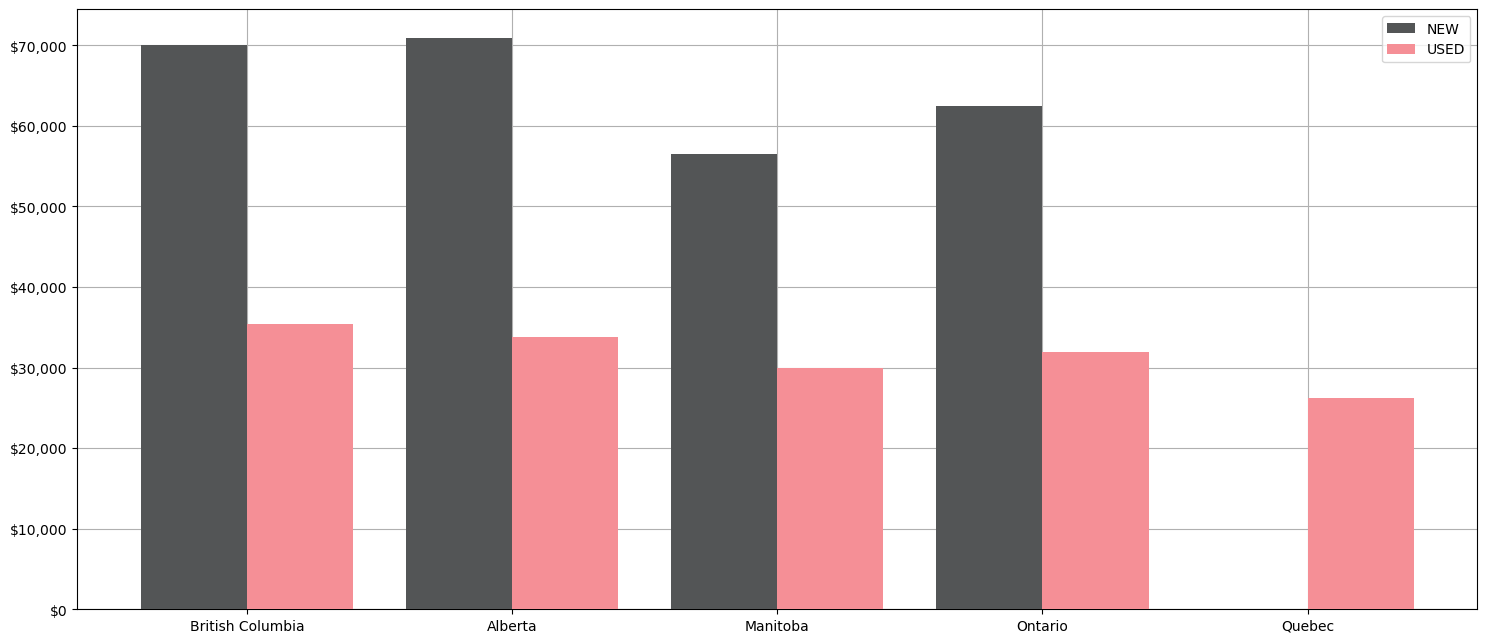

In [17]:
data = df_x.loc[df_x['Descriptor'].str.contains('average')].replace('nan',0)
data = [[float(x) for x in data['New'].values], [float(x) for x in data['Used'].values]]

X=['British Columbia', 'Alberta', 'Manitoba', 'Ontario', 'Quebec']
x= np.arange(len(X))

fig = plt.figure(figsize=(14,6))

ax = fig.add_axes([0,0,1,1])

ax.bar( x- 0.2, data[0], color = '#535556',  width = 0.4, label = 'NEW', zorder=3)
ax.bar(x + 0.2, data[1], color = '#f58f96', width = 0.4, label = 'USED', zorder=3)
plt.xticks(x, X)
tick = mtick.StrMethodFormatter('${x:,.0f}')


ax.yaxis.set_major_formatter(tick) 

ax.grid(zorder=0)
plt.legend()